In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
keras = tf.keras
layers = keras.layers
models = keras.models
optimizers = keras.optimizers

In [80]:
working_dir = 'datasets/shapes'
classes = ['circle', 'square', 'star', 'triangle']
seed = 2

training_set, testing_set = keras.preprocessing.image_dataset_from_directory(
    directory=working_dir,
    class_names=classes,
    color_mode="grayscale",
    batch_size=100,
    subset="both",
    validation_split=0.2,
    seed=seed,
    label_mode='categorical'
)


Found 14970 files belonging to 4 classes.
Using 11976 files for training.
Using 2994 files for validation.


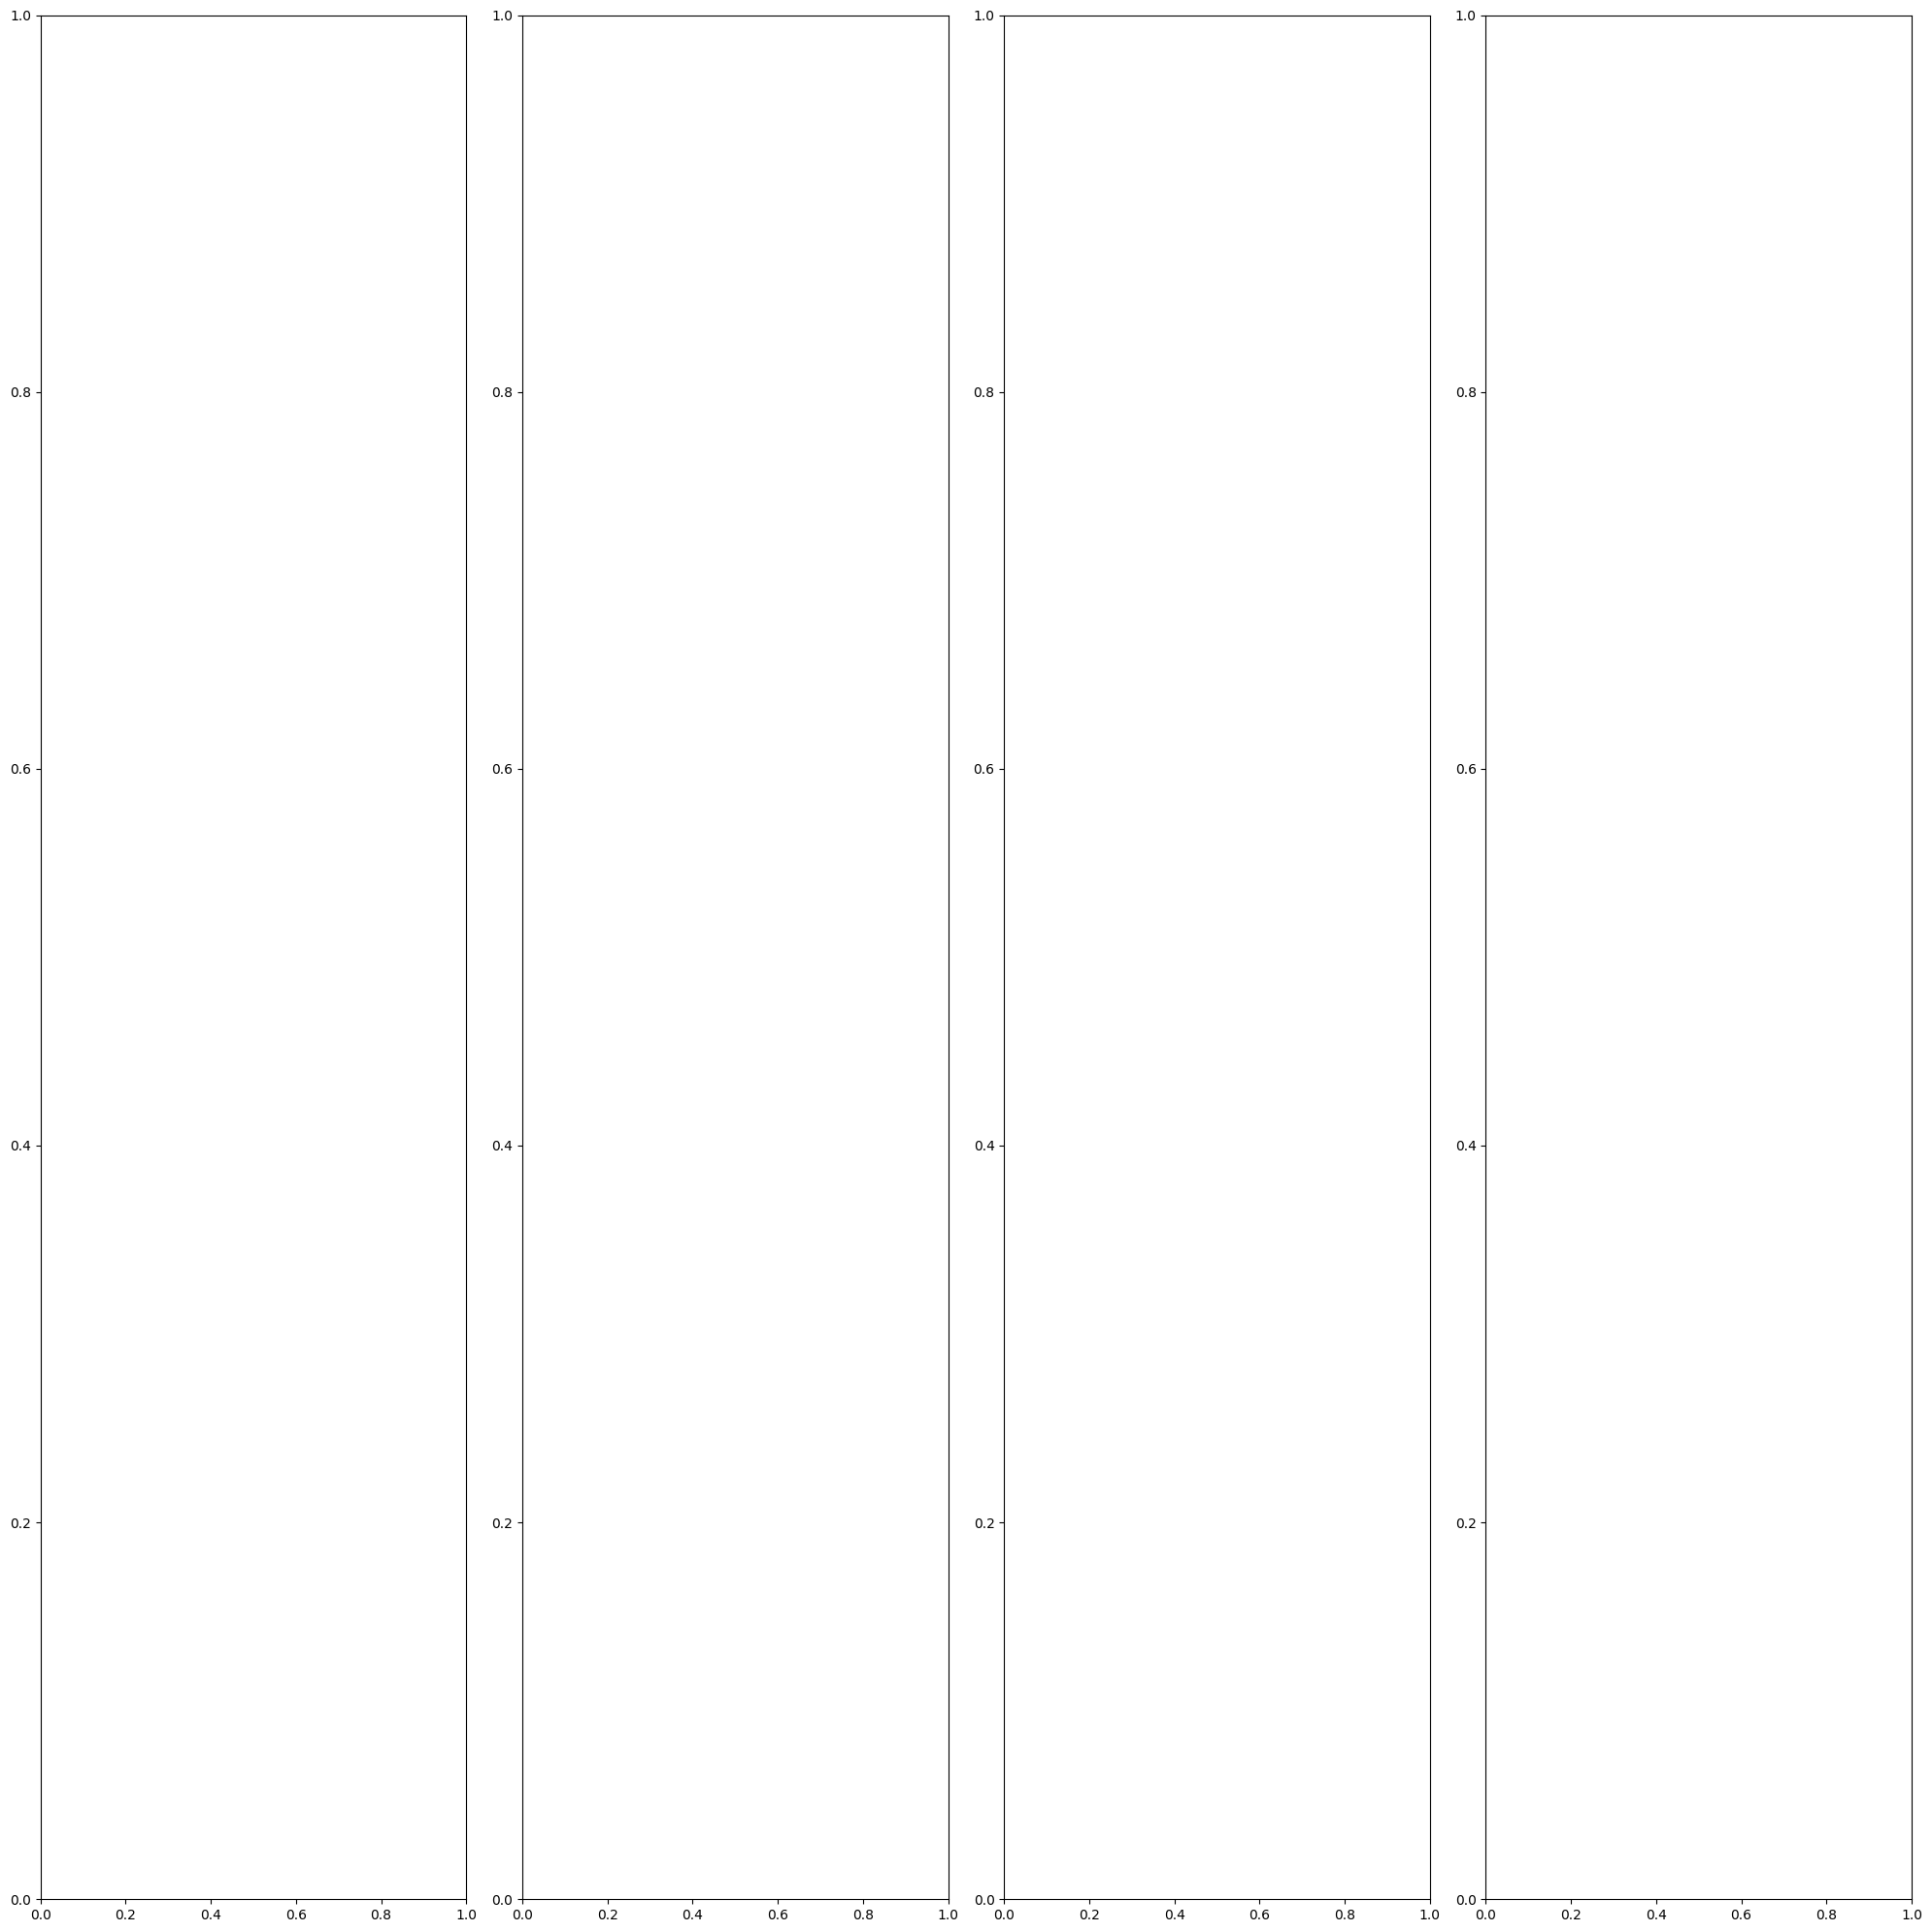

In [86]:
fig, axes = plt.subplots(1, 4, figsize=(20,20))

axes = axes.flatten()
axes_idx = 0

for images, labels in training_set.take(10): 
    numpy_images = images.numpy()
    numpy_labels = labels.numpy()

for one_hot_label in np.unique(numpy_labels):
    for image, label in zip(numpy_images, numpy_labels):
        if np.array_equal(label,one_hot_label):
            ax = axes[axes_idx]
            ax.imshow(image[:,:,0], cmap='Greys_r')
            ax.axis('off')
            ax.set_title(one_hot_label)
            axes_idx += 1
            break

plt.tight_layout()

plt.show()

In [82]:
convolutional_layer = layers.Conv2D(16, (5, 5), activation='relu', input_shape=images[0].shape)
max_pool_layer = layers.MaxPool2D()
flatten_layer = layers.Flatten()
dense_layer = layers.Dense(units=4, activation = 'softmax')

c:\Users\yoann\Documents\Projet AI\introduction-to-deep-learning\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
model = models.Sequential([convolutional_layer,max_pool_layer, flatten_layer,dense_layer])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 252, 252, 16)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 126, 126, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 254016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │     1,016,068 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,016,484 (3.88 MB)

 Trainable params: 1,016,484 (3.88 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
model.compile(optimizer=optimizers.Adam(),loss='categorical_crossentropy',metrics=["accuracy"])

history = model.fit(training_set, epochs=5)

Epoch 1/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 68s 546ms/step - accuracy: 0.7216 - loss: 977.3175
Epoch 2/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 61s 506ms/step - accuracy: 0.9972 - loss: 0.2222
Epoch 3/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 502ms/step - accuracy: 0.9998 - loss: 0.0280
Epoch 4/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 61s 509ms/step - accuracy: 0.9858 - loss: 4.2850
Epoch 5/5
120/120 ━━━━━━━━━━━━━━━━━━━━ 60s 498ms/step - accuracy: 0.9987 - loss: 0.0692


In [85]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 4), dtype=tf.float32, name=None))>